# Notebook 3: Regression

## Introduction

In this notebook we will look at Simple Linear Regression, Multiple Linear Regression and Polynomial Regression as part of which we will touch upon the concepts of Under/Overfitting and Regularisation. For the most part we will either use the Normal Equations in our analysis. However the normal equations become unwieldy with large amounts of data, so at the end we will touch upon numerical optimisation and Gradient Descent in particular.

On the coding side we will use Python, Numpy, Pandas and Scikit-Learn. And we will code up some of the simpler algorithms and then compare the results with those of Scikit-Learn's implementation.

There are many advanced forms of regression that we won't touch upon including those using Kernels, Gaussian Processes, Neural Nets, Decision Trees, Boostong etc. However, the idea here is to give a thorough feel for key concepts, and to introduce you to some useful tools for manipulating them.

Some of the code in this notebook originally comes from code accompanying 'Hands-On Machine Learning with Scikit-Learn & Tensorflow', by A. Geron, and some from this tutorial on Ridge Regression and the Lasso in Python:
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in their respective documentation. As usual Numpy, Pandas, and Scikit-Learn will be used heavily.

In [2]:
#Standard Python libraries for data and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Import error metric
from sklearn.metrics import mean_squared_error

#Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Display charts in the notebook
%matplotlib inline

## Create training data

We will begin by creating some linear data with Gaussian noise added:

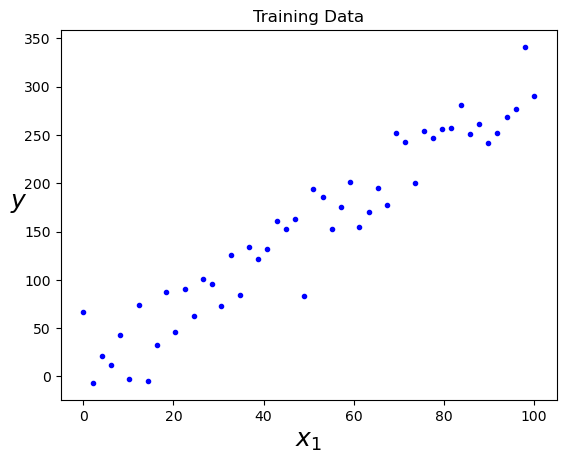

In [3]:
#We will create some one dimensional data with a bit of noise
num_points = 50
# Return evenly spaced numbers over a specified interval (reshaped to a column vector).
X = np.linspace(0,100,num_points).reshape(num_points,1) 
# Multiplication of the random values by 25 increases the weight of these random numbers (they are small compared to the X values)
y = (4 + 3 * X) + 25*np.random.randn(num_points, 1)

#Plot the data
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Training Data')
plt.show()

## Simple Linear Regression

The function below accepts training data in the form of a design matrix, $\mathbf{X}$ and target data in the form of an output vector, $\mathbf{y}$ and returns optimal parameters, $\mathbf{w}$. 
As in the lectures, $\mathbf{w}$ characterises the weight vector associated with some linear mapping, $f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x}$, which seeks to map inputs to outputs.

Notice that in this case we have 50 one-dimensional training points, so $\mathbf{X}$ will be a numpy array of shape (50,1).  
And we have one input attribute, and one bias term, so in this case $\mathbf{w}$ will be a Numpy array of shape (2,1).

### Learn $\mathbf{w}$ using the Normal Equations:

__Task:__  
Now, write a function to fit the data and return optimal weight parameters:

_Steps:_  
a) Prepend a vector of ones onto the training data (to include the bias term)  
b) Calculate `w_best` using the Normal Equations.

(Try to make the function as general as possible by allowing it to accept higher dimensional inputs in order to save further work when you do Multiple Linear Regression later).

In [4]:
def simple_linear_regression(X, y):
    ########################################################
    # TO_DO
    #[your code here]
    
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w_best

    # /TO_DO
    ########################################################

__Task:__  
Now, write a function that, given parameters `w` and input test data `X_test`, returns predictions `y_pred`.

`X_test` will be of dimension (50,1), and in the case of  Simple Linear Regression, `w` will be of dimension (2,1).

In [5]:
def pred(w, X_test):
    ########################################################
    # TO_DO
    #[your code here]
    
    y_pred = w[0]+np.dot(X_test,w[1:])
    return y_pred

    # /TO_DO
    ########################################################

__Task:__  
Use your two functions to create predictions given the input data `X`.  
Call the variable containing the predictions `ypred`.

In [6]:
########################################################
# TO_DO
#[your code here]

w_best = simple_linear_regression(X, y)
ypred = pred(w_best,X)

# /TO_DO
########################################################

### Learn $\mathbf{w}$ using Scikit-Learn:

__Task:__  
1) Create a linear regression model using Scikit-Learn  
2) Fit the model using `X` and `y`  
3) Predict `y` given the fitted model and `X`. Put this predicition in a variable `y_lr`  
4) Calculate Mean Squared Errors for the hand coded and the Scikit-Learn models. Put the results in variables `mse` and `mse_lr`

In [7]:
########################################################
# TO_DO
#[your code here]

lr = LinearRegression()
lr.fit(X, y)
y_lr = lr.predict(X)
mse_lr = mean_squared_error(y, y_lr) # y_lr = Scikit model output 
mse = mean_squared_error(y, ypred) # ypred = hand coded model output from cell above

# /TO_DO
########################################################

### Comparison:

If everything has been carried out correctly then when you run the code in the next cell you should see the training data (as blue dots), the line of best fit from your own code, `ypred`, and the best fit from your Scikit-Learn implementation (green '+'s).  
The red line should be a good fit to the blue training data and the green '+'s should be an exact match to the red line.  
The mean squared errors are also reported and should be very similar.

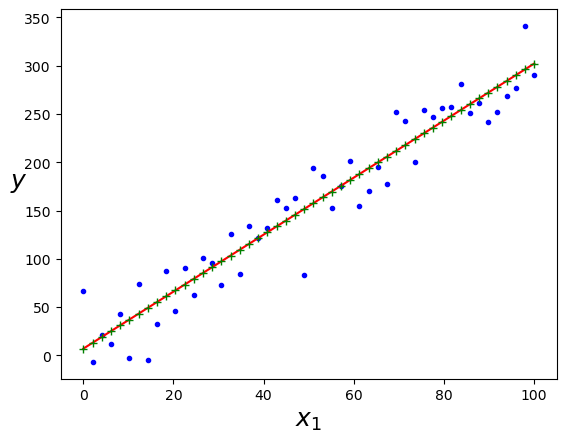

MSE - Sci kit 678.066501097896 , MSE - Hand-Coded 678.0665010978961


In [8]:
# PLEASE DO NOT CHANGE THIS CELL
# We wish to plot the variables you created: ypred, y_lr
plt.plot(X, y, 'b.')
plt.plot(X, ypred, 'r-')
plt.plot(X, y_lr, 'g+')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()
print("MSE - Sci kit",mse_lr,",","MSE - Hand-Coded",mse)

## Multiple Linear Regression

We will now examine Multiple Linear Regression, and this time we will go directly through the Scikit-Learn workflow.

To avoid data cleaning/ munging etc. we will use the Boston housing data from the last tutorial.

In [9]:
##PLEASE DO NOT CHANGE THIS CELL: Load the Boston data again
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_boston = raw_df.values[1::2, 2]

### Data Processing & Model Training:

__Task:__  
1) Create a train/test split in the Boston data set.  
(_Hint:_ Use `train_test_split()`, choose `test_size=0.2`, and `random_state=42`, and call the variables containing the train(test) inputs `X_train`(`X_test`) and the train(test) targets `y_train`(`y_test`).  
2) Linear regression parameter outputs are dependent on the scale of the features. Use `StandardScalar` to fit/transform the training data and to fit the test data. (Consider why we do not also fit on the test data.)  
3) Create a linear regression model, fit it, and store predictions for `X_test` in a variable called `y_lr_boston`.  
4) How good is your trained model on the test data? Calculate the Mean Squared Error between `y_test` and `y_lr_boston`, and store the result in a variable called `mse_lr_boston`.

In [10]:
########################################################
# TO_DO
#[your code here]

# Split
# random_state: Controls the shuffling applied to the data before applying the split. 
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Standardise
# More about feature scaling: 
# 1.) https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
# "The fit method is calculating the mean and variance of each of the features present in our data. 
# The transform method is transforming all the features using the respective mean and variance."
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit
lr_boston = LinearRegression()
lr_boston.fit(X_train, y_train)
y_lr_boston = lr_boston.predict(X_test)

# MSE
mse_lr_boston = mean_squared_error(y_test, y_lr_boston)

# /TO_DO
########################################################

__Task:__  
Now use your own model as before.

(If you had already coded your function to handle multiple dimensions then you have no alterations to make to the Simple Linear Regression function, otherwise you will need to generalise a little for higher dimensional data).

_Steps:_  
1) Use the Simple Linear Regression function with training inputs from your standard scalar to fit optimal weight parameters `w_boston`  
2) Make your predictions given your parameters and input test data. Store your predictions for `X_test` in a variable called `ypred_boston`  
3) Calculate the mean squared errors of your predictions. Store your answer in a variable called `mse_ypred_boston`  

In [11]:
########################################################
# TO_DO
#[your code here]

w_boston = simple_linear_regression(X_train, y_train)
ypred_boston = pred(w_boston,X_test)
mse_ypred_boston = mean_squared_error(y_test, ypred_boston)

# /TO_DO
########################################################

### Comparison:

Because we are dealing with multiple dimensions, visualisation is less simple. 

Below we show our model compared with the Scikit-Learn version: we create a scatter graph against of the `y_test` results. The pattern should be close to identical. 

We also show the Mean Squared Errors on the test set of the two models: These should be very similar.

In [12]:
##PLEASE DO NOT CHANGE THIS CELL

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].scatter(ypred_boston,y_test)
axes[0].set_title("Linear Regression")
axes[1].scatter(y_lr_boston,y_test)
axes[1].set_title("SKLearn Linear Regression")


print("MSE-hand coded",mse_ypred_boston, "MSE-Sci-Kit",mse_lr_boston)

MSE-hand coded 24.29111947497351 MSE-Sci-Kit 24.291119474973527
